### The purpose of this script is to intake daily yield data from the California Strawberry Comission

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

In [28]:
# Load excel files
folder_path = "./data"

# List all files
all_files = os.listdir(folder_path)

# Filter the list to include only excel files and extract the year
excel_files = [file for file in all_files if file.endswith('.xlsx')]

# Extract and sort the files by year
excel_files = sorted(excel_files, key=lambda x: int(re.search(r'\d{4}', x).group()))
print(excel_files)

# Initialize list to store data
dataframes = []

# Process each file
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path, sheet_name='District Report', skiprows=11)
    print(f"Reading file: {file}")
    dataframes.append(df)
    
# Concatenate dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

# Convert the 'Date' column to datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')

print(combined_df.head())
print("Number of rows in combined Dataframe:", len(combined_df))

['SantaMariaDistrictReport2012.xlsx', 'SantaMariaDistrictReport2013.xlsx', 'SantaMariaDistrictReport2014.xlsx', 'SantaMariaDistrictReport2015.xlsx', 'SantaMariaDistrictReport2016.xlsx', 'SantaMariaDistrictReport2017.xlsx', 'SantaMariaDistrictReport2018.xlsx', 'SantaMariaDistrictReport2019.xlsx', 'SantaMariaDistrictReport2020.xlsx', 'SantaMariaDistrictReport2021.xlsx', 'SantaMariaDistrictReport2022.xlsx', 'SantaMariaDistrictReport2023.xlsx', 'SantaMariaDistrictReport2024.xlsx']
Reading file: SantaMariaDistrictReport2012.xlsx
                  Date Volume (Pounds)  Unnamed: 2  Unnamed: 3  \
0  2012-01-02 00:00:00          23,400         NaN         NaN   
1  2012-01-03 00:00:00          26,064         NaN         NaN   
2  2012-01-04 00:00:00          32,382         NaN         NaN   
3  2012-01-05 00:00:00          69,804         NaN         NaN   
4  2012-01-06 00:00:00          18,000         NaN         NaN   

  Cumulative Volumne (Pounds)  Unnamed: 5 FOB Per Pound  Unnamed: 7  \
0 

In [29]:
# Drop unnecessary columns
data_cleaned = combined_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 5', 'FOB Per Pound', 'Unnamed: 7', 'Unnamed: 8', 'Crop Value', 'Unnamed: 10', 'Unnamed: 11'])

print("DF Length:", len(combined_df), "\n")

print(data_cleaned.head())

DF Length: 4096 

        Date Volume (Pounds) Cumulative Volumne (Pounds) Pounds/Acre
0 2012-01-02          23,400                      23,400           2
1 2012-01-03          26,064                      49,464           3
2 2012-01-04          32,382                      81,846           3
3 2012-01-05          69,804                     151,650           7
4 2012-01-06          18,000                     169,650           2


In [30]:
# Filter out rows that don't have valid dates in the 'Date' column
data_cleaned = data_cleaned[pd.to_datetime(data_cleaned['Date']).notnull()]

print("DF Length:", len(combined_df), "\n")

print(data_cleaned.head())

DF Length: 4096 

        Date Volume (Pounds) Cumulative Volumne (Pounds) Pounds/Acre
0 2012-01-02          23,400                      23,400           2
1 2012-01-03          26,064                      49,464           3
2 2012-01-04          32,382                      81,846           3
3 2012-01-05          69,804                     151,650           7
4 2012-01-06          18,000                     169,650           2


In [31]:
# Convert the 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Now convert the 'Date' column to only include the date part
data_cleaned['Date'] = data_cleaned['Date'].dt.date

print("DF Length:", len(combined_df), "\n")

print(data_cleaned.head())

DF Length: 4096 

         Date Volume (Pounds) Cumulative Volumne (Pounds) Pounds/Acre
0  2012-01-02          23,400                      23,400           2
1  2012-01-03          26,064                      49,464           3
2  2012-01-04          32,382                      81,846           3
3  2012-01-05          69,804                     151,650           7
4  2012-01-06          18,000                     169,650           2


In [32]:
# Print the data types
print("Column Data Types:")
print(data_cleaned.dtypes)

Column Data Types:
Date                           object
Volume (Pounds)                object
Cumulative Volumne (Pounds)    object
Pounds/Acre                    object
dtype: object


In [33]:
# Convert data types
data_cleaned['Volume (Pounds)'] = data_cleaned['Volume (Pounds)'].str.replace(',', '').astype(float)
data_cleaned['Pounds/Acre'] = data_cleaned['Pounds/Acre'].astype(float)
data_cleaned['Cumulative Volumne (Pounds)'] = data_cleaned['Cumulative Volumne (Pounds)'].str.replace(',', '').astype(float)

# Print the data types
print("Updated Column Data Types:")
print(data_cleaned.dtypes)

print("DF Length:", len(combined_df), "\n")

print(data_cleaned.head())

Updated Column Data Types:
Date                            object
Volume (Pounds)                float64
Cumulative Volumne (Pounds)    float64
Pounds/Acre                    float64
dtype: object
DF Length: 4096 

         Date  Volume (Pounds)  Cumulative Volumne (Pounds)  Pounds/Acre
0  2012-01-02          23400.0                      23400.0          2.0
1  2012-01-03          26064.0                      49464.0          3.0
2  2012-01-04          32382.0                      81846.0          3.0
3  2012-01-05          69804.0                     151650.0          7.0
4  2012-01-06          18000.0                     169650.0          2.0


In [34]:
# Basic Information
print("Basic Information:")
print(data_cleaned.info(), "\n")

# Descriptive Statistics
print("Descriptive Statistics:")
print(data_cleaned.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 3970 entries, 0 to 4087
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         3970 non-null   object 
 1   Volume (Pounds)              3970 non-null   float64
 2   Cumulative Volumne (Pounds)  3970 non-null   float64
 3   Pounds/Acre                  3934 non-null   float64
dtypes: float64(3), object(1)
memory usage: 155.1+ KB
None

Descriptive Statistics:
       Volume (Pounds)  Cumulative Volumne (Pounds)  Pounds/Acre
count     3.970000e+03                 3.970000e+03  3934.000000
mean      1.927150e+06                 3.187268e+08   149.554398
std       1.800158e+06                 2.287161e+08   136.084066
min       5.850000e+02                 2.340000e+04     1.000000
25%       3.600158e+05                 6.552943e+07    30.000000
50%       1.513224e+06                 3.580620e+08   126.

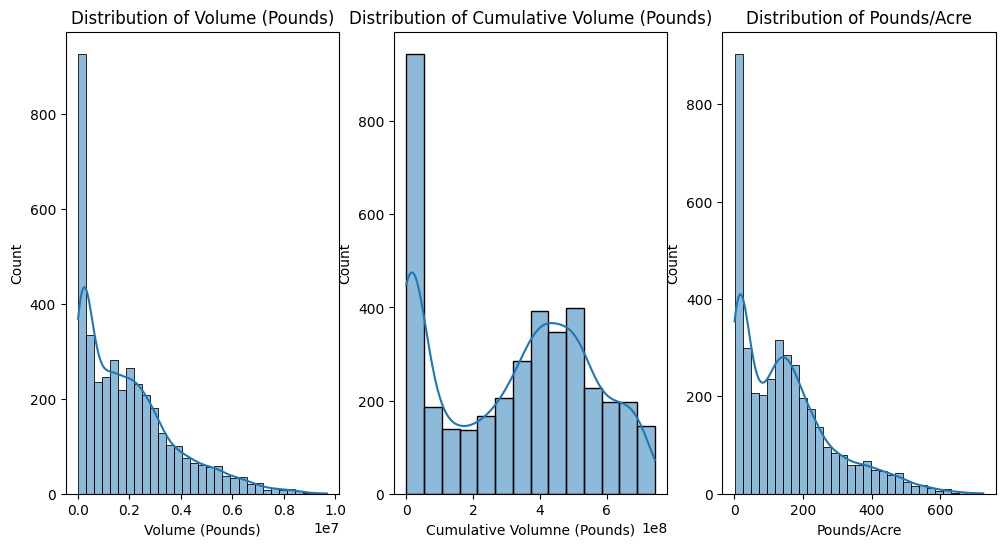

In [43]:
# Visualizing Data Distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data_cleaned['Volume (Pounds)'], kde=True)
plt.title('Distribution of Volume (Pounds)')

plt.subplot(1, 3, 2)
sns.histplot(data_cleaned['Cumulative Volumne (Pounds)'], kde=True)
plt.title('Distribution of Cumulative Volume (Pounds)')

plt.subplot(1, 3, 3)
sns.histplot(data_cleaned['Pounds/Acre'], kde=True)
plt.title('Distribution of Pounds/Acre')

plt.show()

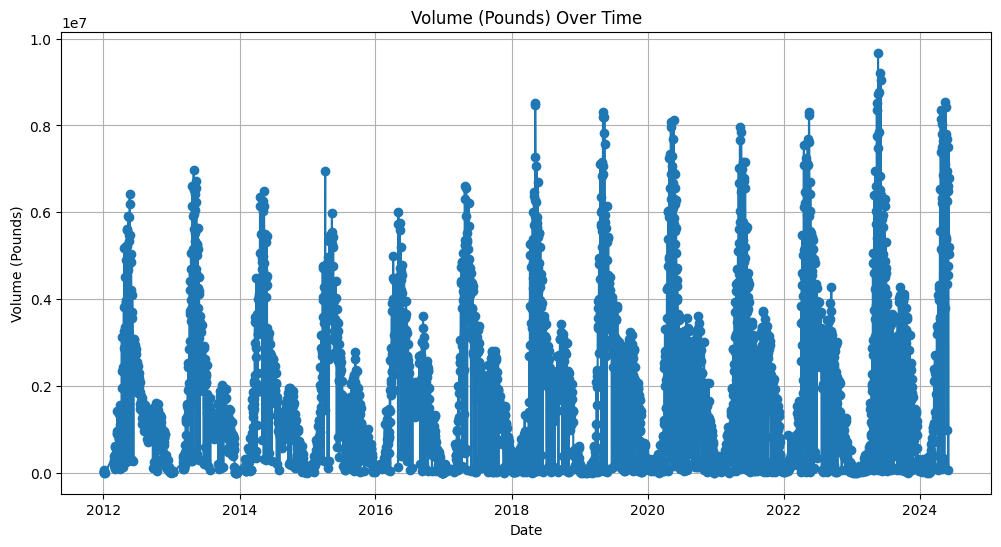

In [37]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Volume (Pounds)'], marker='o')
plt.title('Volume (Pounds) Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Pounds)')
plt.grid(True)
plt.show()